In [1]:
#libreria de entrada salida de datos
import scipy.io as sio
#transforamda rapida de fourier, para cuantificar las oscilaciones
from scipy import stats
#manejo de tensores ndarray
import numpy as np
#graficar
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
#estoy cargando unos datos que fueron previamente recolectados
#usamos el sio para cargar los datos
path = r"C:\Users\M413UA\Downloads\P046_EP_reposo.mat"
mat_contents = sio.loadmat(path) 
print(f'La variable cargada es del tipo: {type(mat_contents)}') 
print(f'las llaves son: {mat_contents.keys()}') 

La variable cargada es del tipo: <class 'dict'>
las llaves son: dict_keys(['__header__', '__version__', '__globals__', 'data'])


In [5]:
senal = mat_contents['data'] 
print("dimensión: ",senal.ndim) 
print("Forma: ",senal.shape) 

dimensión:  3
Forma:  (8, 2000, 167)


In [6]:
#COMO HACEMOS CONTINUA
sensores = senal.shape[0] 
puntos = senal.shape[1] 
epocas = senal.shape[2]

In [7]:

#reshape(senal_original, forma_nueva)
senal_continua = np.reshape(senal,(sensores,puntos*epocas),order = 'F') 
print(senal_continua.shape) 

(8, 334000)


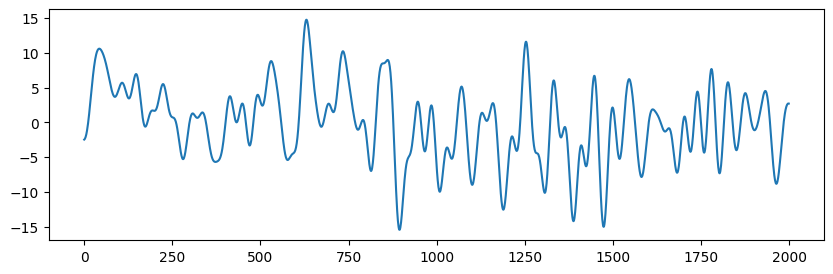

In [8]:
fig = plt.figure(figsize=(10,3))
plt.plot(senal_continua[0,0:2000])
plt.show()

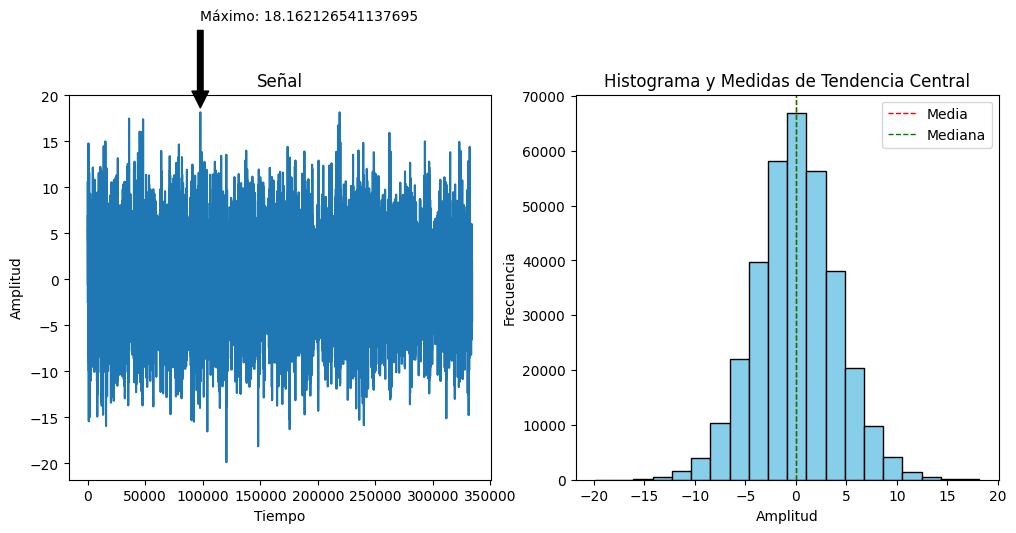

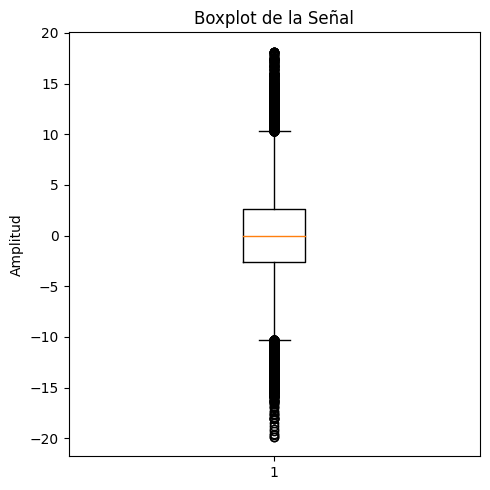

In [2]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

def cargar_y_graficar_mat(filename,sensor):
    # Cargar la señal desde el archivo .mat
    data = scipy.io.loadmat(filename)
    signal = data['data']
    senal_continua = np.reshape(signal,(signal.shape[0],signal.shape[1]*signal.shape[2]),order = 'F') 

    # Encontrar el índice del valor máximo y su valor
    indice_maximo = np.argmax(senal_continua[sensor,:])
    valor_maximo = np.max(senal_continua[sensor,:])
    
    # Crear el subplot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Graficar la señal en el primer subplot
    ax1.plot(senal_continua[sensor,:])
    ax1.set_xlabel('Tiempo')
    ax1.set_ylabel('Amplitud')
    ax1.set_title('Señal')
    
    # Agregar la flecha en el punto máximo
    ax1.annotate(f'Máximo: {valor_maximo}', 
                 xy=(indice_maximo, valor_maximo), 
                 xytext=(indice_maximo, valor_maximo + 10),
                 arrowprops=dict(facecolor='black', shrink=0.05))
    
    # Graficar histograma y etiquetar medidas de tendencia central en el segundo subplot
    ax2.hist(senal_continua[sensor,:], bins=20, color='skyblue', edgecolor='black')
    ax2.axvline(np.mean(senal_continua[sensor,:]), color='red', linestyle='dashed', linewidth=1, label='Media')
    ax2.axvline(np.median(senal_continua[sensor,:]), color='green', linestyle='dashed', linewidth=1, label='Mediana')
    ax2.legend()
    ax2.set_xlabel('Amplitud')
    ax2.set_ylabel('Frecuencia')
    ax2.set_title('Histograma y Medidas de Tendencia Central')
    
    # Añadir un boxplot en un tercer subplot
    fig, ax3 = plt.subplots(figsize=(5, 5))
    ax3.boxplot(senal_continua[sensor,:])
    ax3.set_ylabel('Amplitud')
    ax3.set_title('Boxplot de la Señal')
    
    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
cargar_y_graficar_mat(r"C:\Users\M413UA\Downloads\P046_EP_reposo.mat",0)


c:\Users\M413UA\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


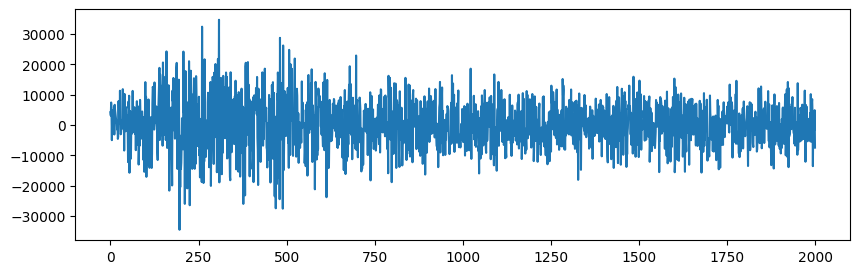

In [9]:
from scipy.fft import fft
transformada = fft(senal_continua[0,:])
fig = plt.figure(figsize=(10,3))
plt.plot(transformada[0:2000])
plt.show()

C:\Users\M413UA\AppData\Local\Temp\ipykernel_21696\1090891833.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  moda=pd_senal.apply(lambda x : stats.mode(x), axis=1)


<AxesSubplot: ylabel='Density'>

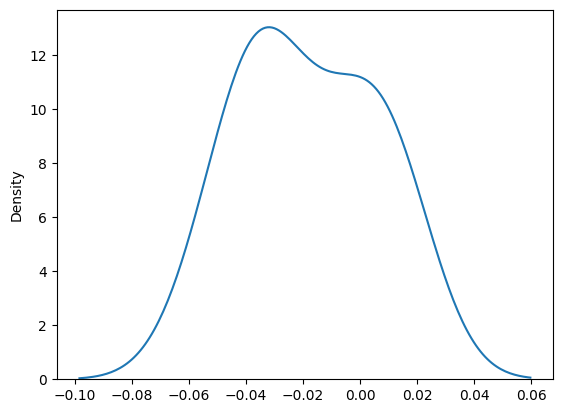

In [10]:
#Vamos a sacar el promedio,la moda y la mediana a cada uno de los sensores
pd_senal=pd.DataFrame(senal_continua)
promedio=pd_senal.mean(axis=1)
mediana=pd_senal.median(axis=1)
moda=pd_senal.apply(lambda x : stats.mode(x), axis=1)
sns.kdeplot(promedio)


### OpenCV

In [24]:
import cv2

img = cv2.imread(r"C:\Users\M413UA\Documents\ISABELLA\Catedra\Material_info\Info-2\Unidad 2\OpenCV\brain.png", cv2.IMREAD_COLOR)
cv2.imshow('Imagen Original', img)
# Esperar a que se presione una tecla y cerrar la ventana
cv2.waitKey(0)
cv2.destroyAllWindows()


In [25]:
#Podemos ver la forma de la imagen
img.shape

(810, 1200, 3)

In [26]:
# Convertir la imagen a escala de colores cálidos
colormap = cv2.applyColorMap(img, cv2.COLORMAP_HOT)

# Convertir la imagen a escala de grises
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Mostrar la imagen en escala de grises
cv2.imshow('Imagen cálida', colormap)
cv2.imshow('Imagen en Grises', gris)
# Esperar a que se presione una tecla y cerrar la ventana
cv2.waitKey(0)
cv2.destroyAllWindows()


In [27]:
# Aplicar un filtro Gaussiano para reducir ruido
img_filtrada = cv2.GaussianBlur(gris, (5, 5),0)

# Mostrar la imagen filtrada
cv2.imshow('Imagen Filtrada', img_filtrada)

# Esperar a que se presione una tecla y cerrar la ventana
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
# Detectar bordes utilizando el operador de Canny
bordes = cv2.Canny(img_filtrada, 100, 200)

# Mostrar los bordes detectados
cv2.imshow('Bordes Detectados', bordes)

# Esperar a que se presione una tecla y cerrar la ventana
cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
# Detectar bordes utilizando el operador de Canny
img1=cv2.imread(r"C:\Users\M413UA\Documents\ISABELLA\Catedra\Material_info\Info-2\Unidad 2\OpenCV\imagen.jpg", cv2.IMREAD_COLOR)
# Mostrar imagen
cv2.imshow('Mario', img1)

bordes = cv2.Canny(img1, 30, 200)

# Mostrar los bordes detectados
cv2.imshow('Bordes Detectados', bordes)

# Esperar a que se presione una tecla y cerrar la ventana
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
import numpy as np
def generar_matriz_cruz(n):
    matriz = np.zeros((n, n),)
    centro = n // 2
    for r in range(n):
        matriz[centro, r] = 1  
        matriz[r, centro] = 1  
    return matriz

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.